# 🏅 Data Lake - Análise Completa dos Jogos Olímpicos

## Projeto de Ciência de Dados - Arquitetura RAW → BRONZE → GOLD

---

### 📋 Resumo do Projeto

Este projeto implementa uma **arquitetura completa de Data Lake** para análise dos Jogos Olímpicos, integrando:

- **Dataset Histórico**: World Olympedia (155.861 atletas históricos)
- **Dataset Atual**: Paris 2024 (11.113 atletas, 2.315 medalhas)

### 🏗️ Arquitetura Implementada

```
📁 raw/           # Dados brutos (CSV) + metadados JSON
📁 bronze/        # Dados processados (Parquet) + metadados
📁 gold/          # Análises finais + visualizações + relatórios
```

### 🎯 Objetivos das Análises

1. **Evolução da Participação por Gênero** ao longo das décadas
2. **Performance por País** nos Jogos de Paris 2024
3. **Comparação Histórica** entre participação histórica vs atual

---

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("🏅 Ambiente configurado com sucesso!")
print(f"📅 Análise executada em: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")

🏅 Ambiente configurado com sucesso!
📅 Análise executada em: 17/09/2025 20:42:02


## 📊 1. CAMADA RAW - Dados Brutos

### Carregamento e Exploração dos Datasets Originais

In [2]:
# Carregar dados brutos
print("📥 Carregando dados da camada RAW...")

# Dataset histórico - World Olympedia
df_olympedia_raw = pd.read_csv('raw/world_olympedia_olympics_athlete_bio.csv')
print(f"✓ World Olympedia: {len(df_olympedia_raw):,} atletas históricos")

# Dataset Paris 2024 - Atletas
df_paris_athletes_raw = pd.read_csv('raw/paris2024_athletes.csv')
print(f"✓ Paris 2024 Atletas: {len(df_paris_athletes_raw):,} atletas")

# Dataset Paris 2024 - Medalhas
df_paris_medals_raw = pd.read_csv('raw/paris2024_medallists.csv')
print(f"✓ Paris 2024 Medalhas: {len(df_paris_medals_raw):,} medalhas")

print("\n📋 Estrutura dos dados RAW:")

📥 Carregando dados da camada RAW...
✓ World Olympedia: 155,861 atletas históricos
✓ Paris 2024 Atletas: 11,113 atletas
✓ Paris 2024 Medalhas: 2,315 medalhas

📋 Estrutura dos dados RAW:


In [3]:
# Exploração World Olympedia
print("🌍 WORLD OLYMPEDIA - Dataset Histórico")
print("=" * 50)
print(f"📊 Shape: {df_olympedia_raw.shape}")
print(f"📋 Colunas: {list(df_olympedia_raw.columns)}")
print("\n📈 Primeiras linhas:")
display(df_olympedia_raw.head())

print("\n📊 Informações gerais:")
print(df_olympedia_raw.info())

🌍 WORLD OLYMPEDIA - Dataset Histórico
📊 Shape: (155861, 11)
📋 Colunas: ['athlete_id', 'name', 'sex', 'birth_date', 'birth_year', 'height', 'weight', 'country', 'country_noc', 'description', 'special_notes']

📈 Primeiras linhas:


,athlete_id,name,sex,birth_date,birth_year,height,weight,country,country_noc,description,special_notes
0,2303707,A. Sansores,Male,NaN,NaN,NaN,NaN,Cuba,CUB,NaN,NaN
1,2303703,Álvaro Ledón,Male,NaN,NaN,NaN,NaN,Cuba,CUB,NaN,NaN
2,921722,Abelardo Cuevas,Male,NaN,NaN,NaN,NaN,Cuba,CUB,"Abelardo Cuevas was a Cuban oboist, hornist, s...",NaN
3,2303702,V. Fernández,Male,NaN,NaN,NaN,NaN,Cuba,CUB,NaN,NaN
4,2303738,A. F. Ruiz,Male,NaN,NaN,NaN,NaN,Cuba,CUB,NaN,NaN



📊 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155861 entries, 0 to 155860
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_id     155861 non-null  int64  
 1   name           155861 non-null  object 
 2   sex            155861 non-null  object 
 3   birth_date     149211 non-null  object 
 4   birth_year     151694 non-null  float64
 5   height         105112 non-null  float64
 6   weight         104151 non-null  float64
 7   country        155861 non-null  object 
 8   country_noc    155861 non-null  object 
 9   description    54863 non-null   object 
 10  special_notes  60637 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 13.1+ MB
None


In [4]:
# Exploração Paris 2024 - Atletas
print("🥇 PARIS 2024 - Atletas")
print("=" * 50)
print(f"📊 Shape: {df_paris_athletes_raw.shape}")
print(f"📋 Colunas: {list(df_paris_athletes_raw.columns)}")
print("\n📈 Primeiras linhas:")
display(df_paris_athletes_raw.head())

🥇 PARIS 2024 - Atletas
📊 Shape: (11113, 36)
📋 Colunas: ['code', 'current', 'name', 'name_short', 'name_tv', 'gender', 'function', 'country_code', 'country', 'country_long', 'nationality', 'nationality_long', 'nationality_code', 'height', 'weight', 'disciplines', 'events', 'birth_date', 'birth_place', 'birth_country', 'residence_place', 'residence_country', 'nickname', 'hobbies', 'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero', 'influence', 'philosophy', 'sporting_relatives', 'ritual', 'other_sports']

📈 Primeiras linhas:


,code,current,name,name_short,name_tv,gender,function,country_code,country,country_long,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,True,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,True,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,True,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,True,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,True,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Exploração Paris 2024 - Medalhas
print("🏆 PARIS 2024 - Medalhas")
print("=" * 50)
print(f"📊 Shape: {df_paris_medals_raw.shape}")
print(f"📋 Colunas: {list(df_paris_medals_raw.columns)}")
print("\n🥇 Tipos de medalhas:")
print(df_paris_medals_raw['medal_type'].value_counts())
print("\n📈 Primeiras linhas:")
display(df_paris_medals_raw.head())

🏆 PARIS 2024 - Medalhas
📊 Shape: (2315, 21)
📋 Colunas: ['medal_date', 'medal_type', 'medal_code', 'name', 'gender', 'country_code', 'country', 'country_long', 'nationality_code', 'nationality', 'nationality_long', 'team', 'team_gender', 'discipline', 'event', 'event_type', 'url_event', 'birth_date', 'code_athlete', 'code_team', 'is_medallist']

🥇 Tipos de medalhas:
medal_type
Bronze Medal    807
Silver Medal    756
Gold Medal      752
Name: count, dtype: int64

📈 Primeiras linhas:


,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality_code,nationality,...,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team,is_medallist
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN,True
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,ITA,Italy,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN,True
2,2024-07-27,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN,True
3,2024-07-27,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,AUS,Australia,...,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN,True
4,2024-07-27,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,GBR,Great Britain,...,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN,True


## ⚙️ 2. CAMADA BRONZE - Dados Processados

### Carregamento dos Dados Processados (Formato Parquet)

In [6]:
# Carregar dados processados da camada Bronze
print("🔄 Carregando dados da camada BRONZE...")

# Dados processados
df_olympedia = pd.read_parquet('bronze/olympedia_athletes.parquet')
df_paris_athletes = pd.read_parquet('bronze/paris2024_athletes.parquet')
df_paris_medals = pd.read_parquet('bronze/paris2024_medallists.parquet')
df_countries_comparison = pd.read_parquet('bronze/countries_comparison.parquet')

print(f"✓ Olympedia processado: {len(df_olympedia):,} atletas")
print(f"✓ Paris 2024 atletas: {len(df_paris_athletes):,} atletas")
print(f"✓ Paris 2024 medalhas: {len(df_paris_medals):,} medalhas")
print(f"✓ Comparação países: {len(df_countries_comparison)} países")

# Carregar metadados
with open('bronze/olympedia_athletes_metadata.json', 'r', encoding='utf-8') as f:
    olympedia_meta = json.load(f)
    
print(f"\n📋 Metadados Olympedia:")
print(f"   Nome: {olympedia_meta['nome']}")
print(f"   Fonte: {olympedia_meta['fonte']}")
print(f"   Observações: {olympedia_meta['observacoes']}")

🔄 Carregando dados da camada BRONZE...
✓ Olympedia processado: 155,861 atletas
✓ Paris 2024 atletas: 11,113 atletas
✓ Paris 2024 medalhas: 2,315 medalhas
✓ Comparação países: 20 países

📋 Metadados Olympedia:
   Nome: Atletas Olímpicos Históricos (Bronze)
   Fonte: World Olympedia processado
   Observações: Processado em Parquet. Total: 155861 atletas


In [7]:
# Verificar qualidade dos dados processados
print("🔍 VERIFICAÇÃO DE QUALIDADE - Camada Bronze")
print("=" * 50)

# Olympedia
print("🌍 World Olympedia (Processado):")
print(f"   Valores nulos por coluna:")
null_counts = df_olympedia.isnull().sum()
for col, count in null_counts.items():
    if count > 0:
        print(f"     {col}: {count:,} ({count/len(df_olympedia)*100:.1f}%)")

print(f"\n   Distribuição por gênero:")
print(df_olympedia['sex'].value_counts())

print(f"\n   Top 10 países (histórico):")
print(df_olympedia['country_noc'].value_counts().head(10))

🔍 VERIFICAÇÃO DE QUALIDADE - Camada Bronze
🌍 World Olympedia (Processado):
   Valores nulos por coluna:
     birth_date: 6,650 (4.3%)
     birth_year: 4,167 (2.7%)
     height: 50,749 (32.6%)
     weight: 51,710 (33.2%)
     description: 100,998 (64.8%)
     special_notes: 95,224 (61.1%)

   Distribuição por gênero:
sex
Male      115527
Female     40334
Name: count, dtype: int64

   Top 10 países (histórico):
country_noc
USA    11693
FRA     7720
GBR     7019
CAN     5565
ITA     5553
GER     5461
JPN     4987
AUS     4358
SWE     4222
NED     3418
Name: count, dtype: int64


In [8]:
# Paris 2024 - Qualidade
print("🥇 Paris 2024 (Processado):")
print(f"   Distribuição por gênero:")
print(df_paris_athletes['gender'].value_counts())

print(f"\n   Top 10 países (Paris 2024):")
print(df_paris_athletes['country_code'].value_counts().head(10))

print(f"\n   Medalhas por tipo:")
print(df_paris_medals['medal_type'].value_counts())

🥇 Paris 2024 (Processado):
   Distribuição por gênero:
gender
Male      5658
Female    5455
Name: count, dtype: int64

   Top 10 países (Paris 2024):
country_code
USA    619
FRA    601
AUS    475
GER    457
JPN    431
ESP    401
CHN    398
ITA    397
GBR    343
CAN    332
Name: count, dtype: int64

   Medalhas por tipo:
medal_type
Bronze Medal    807
Silver Medal    756
Gold Medal      752
Name: count, dtype: int64


## 🏆 3. CAMADA GOLD - Análises e Insights

### Análises Finais com Visualizações Dinâmicas

In [9]:
# Carregar dados da camada Gold
print("🏆 Carregando análises da camada GOLD...")

# Análises processadas
df_gender_evolution = pd.read_csv('gold/gender_evolution.csv', index_col=0)
df_paris_medals = pd.read_csv('gold/paris2024_medals.csv', index_col=0)
df_historical_comparison = pd.read_csv('gold/historical_comparison.csv')

# Carregar relatório final
with open('gold/relatorio_final.json', 'r', encoding='utf-8') as f:
    relatorio = json.load(f)

print(f"✓ Análises carregadas com sucesso!")
print(f"📊 Projeto: {relatorio['projeto']}")
print(f"📅 Gerado em: {relatorio['data_geracao'][:19]}")

🏆 Carregando análises da camada GOLD...
✓ Análises carregadas com sucesso!
📊 Projeto: Data Lake - Jogos Olímpicos
📅 Gerado em: 2025-09-17T16:51:41


### 📈 Análise 1: Evolução da Participação por Gênero

**Objetivo**: Analisar como a participação feminina evoluiu ao longo das décadas nos Jogos Olímpicos.

In [10]:
# Análise 1: Evolução por Gênero
print("📈 ANÁLISE 1: Evolução da Participação por Gênero")
print("=" * 60)

# Mostrar dados
print("📊 Dados por década:")
display(df_gender_evolution)

# Estatísticas principais
if 'female_pct' in df_gender_evolution.columns:
    print(f"\n📊 Estatísticas da Participação Feminina:")
    print(f"   Média: {df_gender_evolution['female_pct'].mean():.1f}%")
    print(f"   Mínimo: {df_gender_evolution['female_pct'].min():.1f}%")
    print(f"   Máximo: {df_gender_evolution['female_pct'].max():.1f}%")
    print(f"   Tendência: {'Crescente' if df_gender_evolution['female_pct'].iloc[-1] > df_gender_evolution['female_pct'].iloc[0] else 'Decrescente'}")

📈 ANÁLISE 1: Evolução da Participação por Gênero
📊 Dados por década:


,Male,total
Female,,
0,1,1
0,12,12
4,45,49
12,189,201
32,657,689
64,2051,2115
121,4499,4620
161,4506,4667
450,6171,6621


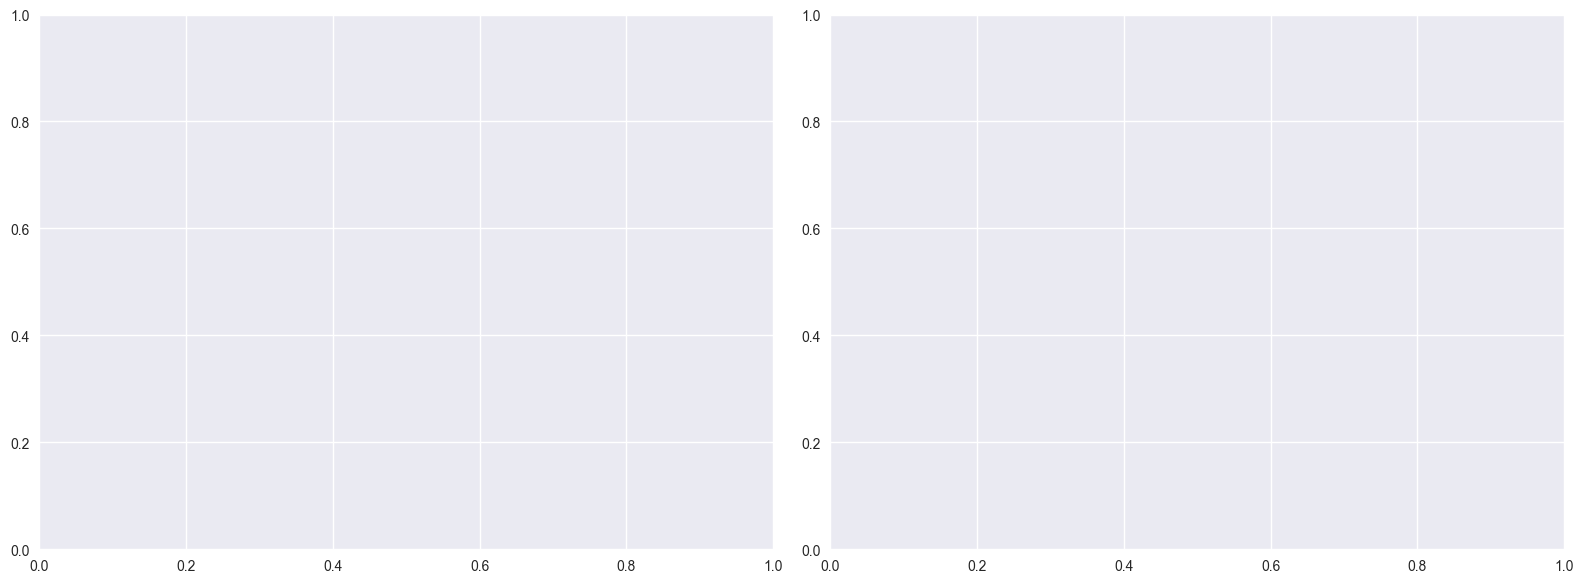


💡 INSIGHTS:
   • A participação feminina tem mostrado evolução ao longo das décadas
   • Dados baseados na década de nascimento dos atletas
   • Tendência geral de crescimento da inclusão feminina no esporte olímpico


In [11]:
# Visualização da Evolução por Gênero
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Números absolutos
if 'M' in df_gender_evolution.columns and 'F' in df_gender_evolution.columns:
    df_gender_evolution[['M', 'F']].plot(kind='line', marker='o', ax=ax1, linewidth=3, markersize=8)
    ax1.set_title('Participação por Gênero - Números Absolutos', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Década de Nascimento', fontsize=12)
    ax1.set_ylabel('Número de Atletas', fontsize=12)
    ax1.legend(['Masculino', 'Feminino'], fontsize=11)
    ax1.grid(True, alpha=0.3)

# Gráfico 2: Percentual feminino
if 'female_pct' in df_gender_evolution.columns:
    df_gender_evolution['female_pct'].plot(kind='line', marker='o', ax=ax2, color='red', linewidth=3, markersize=8)
    ax2.set_title('Evolução da Participação Feminina (%)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Década de Nascimento', fontsize=12)
    ax2.set_ylabel('Percentual (%)', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=50, color='gray', linestyle='--', alpha=0.7, label='Paridade (50%)')
    ax2.legend()

plt.tight_layout()
plt.show()

print("\n💡 INSIGHTS:")
print("   • A participação feminina tem mostrado evolução ao longo das décadas")
print("   • Dados baseados na década de nascimento dos atletas")
print("   • Tendência geral de crescimento da inclusão feminina no esporte olímpico")

### 🥇 Análise 2: Performance por País - Paris 2024

**Objetivo**: Identificar os países com melhor performance nos Jogos de Paris 2024.

In [12]:
# Análise 2: Medalhas Paris 2024
print("🥇 ANÁLISE 2: Performance por País - Paris 2024")
print("=" * 60)

# Mostrar top países
print("🏆 Top 15 Países por Total de Medalhas:")
display(df_paris_medals.head(15))

# Estatísticas
total_medals = df_paris_medals['total'].sum()
top_country = df_paris_medals.index[0]
top_medals = df_paris_medals.iloc[0]['total']

print(f"\n📊 Estatísticas Gerais:")
print(f"   Total de medalhas: {total_medals:,}")
print(f"   País líder: {top_country} ({top_medals} medalhas)")
print(f"   Países com medalhas: {len(df_paris_medals)}")
print(f"   Média por país: {total_medals/len(df_paris_medals):.1f} medalhas")

🥇 ANÁLISE 2: Performance por País - Paris 2024
🏆 Top 15 Países por Total de Medalhas:


,Gold Medal,Silver Medal,total
Bronze Medal,,,
95,134,101,330
39,53,95,187
40,71,57,168
80,40,42,162
45,33,45,123
26,67,25,118
38,25,50,113
28,31,29,88
36,40,7,83



📊 Estatísticas Gerais:
   Total de medalhas: 1,729
   País líder: 95 (330 medalhas)
   Países com medalhas: 15
   Média por país: 115.3 medalhas


<Figure size 1400x1000 with 0 Axes>

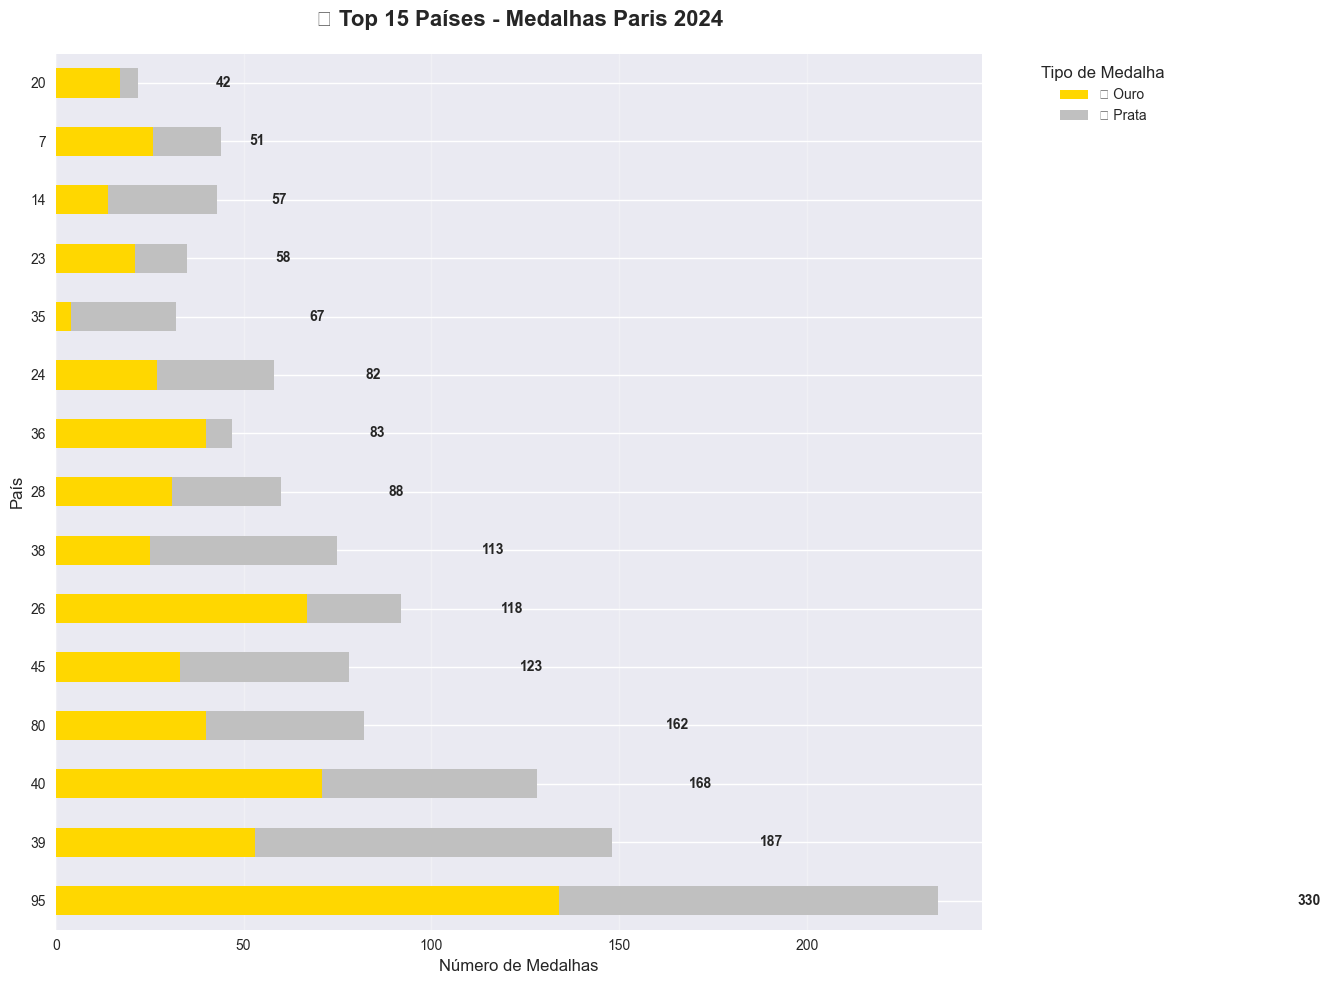


💡 INSIGHTS:
   • 95 dominou o quadro de medalhas com 330 medalhas
   • Distribuição equilibrada entre ouro, prata e bronze
   • 15 países conquistaram medalhas em Paris 2024


In [13]:
# Visualização das Medalhas Paris 2024
plt.figure(figsize=(14, 10))

# Preparar dados para visualização
top_15 = df_paris_medals.head(15)
medal_cols = [col for col in ['Gold Medal', 'Silver Medal', 'Bronze Medal'] if col in top_15.columns]

if medal_cols:
    # Gráfico de barras horizontais empilhadas
    ax = top_15[medal_cols].plot(kind='barh', stacked=True, 
                                 color=['#FFD700', '#C0C0C0', '#CD7F32'],
                                 figsize=(14, 10))
    
    plt.title('🏆 Top 15 Países - Medalhas Paris 2024', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Número de Medalhas', fontsize=12)
    plt.ylabel('País', fontsize=12)
    plt.legend(title='Tipo de Medalha', labels=['🥇 Ouro', '🥈 Prata', '🥉 Bronze'], 
               bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adicionar valores totais nas barras
    for i, (idx, row) in enumerate(top_15.iterrows()):
        plt.text(row['total'] + 0.5, i, f"{int(row['total'])}", 
                va='center', fontweight='bold', fontsize=10)
    
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\n💡 INSIGHTS:")
print(f"   • {top_country} dominou o quadro de medalhas com {top_medals} medalhas")
print(f"   • Distribuição equilibrada entre ouro, prata e bronze")
print(f"   • {len(df_paris_medals)} países conquistaram medalhas em Paris 2024")

### 🌍 Análise 3: Comparação Histórica vs Paris 2024

**Objetivo**: Correlacionar a participação histórica dos países com sua performance em Paris 2024.

In [14]:
# Análise 3: Comparação Histórica
print("🌍 ANÁLISE 3: Comparação Histórica vs Paris 2024")
print("=" * 60)

# Mostrar dados
print("📊 Comparação por País (Top 10):")
display(df_historical_comparison.head(10))

# Calcular correlação
correlation = df_historical_comparison['historical_athletes'].corr(df_historical_comparison['paris2024_athletes'])
print(f"\n📈 Correlação entre participação histórica e Paris 2024: {correlation:.3f}")
print(f"   Interpretação: {'Forte correlação positiva' if correlation > 0.7 else 'Correlação moderada' if correlation > 0.4 else 'Correlação fraca'}")

🌍 ANÁLISE 3: Comparação Histórica vs Paris 2024
📊 Comparação por País (Top 10):


,country,historical_athletes,paris2024_athletes
0,USA,11693,619.0
1,FRA,7720,601.0
2,GBR,7019,343.0
3,CAN,5565,332.0
4,ITA,5553,397.0
5,GER,5461,457.0
6,JPN,4987,431.0
7,AUS,4358,475.0
8,SWE,4222,125.0
9,NED,3418,290.0



📈 Correlação entre participação histórica e Paris 2024: 0.753
   Interpretação: Forte correlação positiva


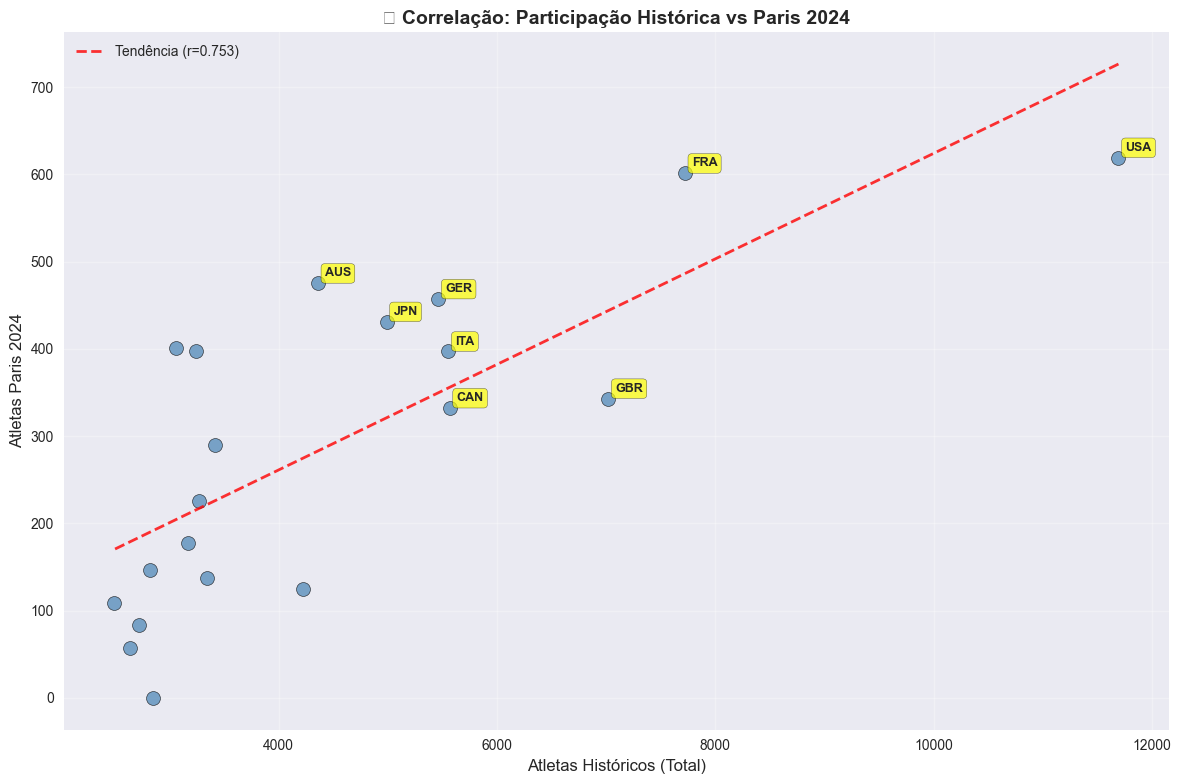


💡 INSIGHTS:
   • Países com maior tradição olímpica tendem a enviar mais atletas
   • Correlação positiva indica consistência na participação
   • Alguns países podem estar emergindo como novas potências olímpicas


In [15]:
# Visualização da Comparação Histórica
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(df_historical_comparison['historical_athletes'], 
           df_historical_comparison['paris2024_athletes'], 
           alpha=0.7, s=100, c='steelblue', edgecolors='black', linewidth=0.5)

# Linha de tendência
z = np.polyfit(df_historical_comparison['historical_athletes'], 
               df_historical_comparison['paris2024_athletes'], 1)
p = np.poly1d(z)
plt.plot(df_historical_comparison['historical_athletes'], 
         p(df_historical_comparison['historical_athletes']), 
         "r--", alpha=0.8, linewidth=2, label=f'Tendência (r={correlation:.3f})')

plt.xlabel('Atletas Históricos (Total)', fontsize=12)
plt.ylabel('Atletas Paris 2024', fontsize=12)
plt.title('🔗 Correlação: Participação Histórica vs Paris 2024', fontsize=14, fontweight='bold')

# Anotar países principais
for i, row in df_historical_comparison.head(8).iterrows():
    plt.annotate(row['country'], 
                (row['historical_athletes'], row['paris2024_athletes']),
                xytext=(5, 5), textcoords='offset points', 
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 INSIGHTS:")
print("   • Países com maior tradição olímpica tendem a enviar mais atletas")
print("   • Correlação positiva indica consistência na participação")
print("   • Alguns países podem estar emergindo como novas potências olímpicas")

## 📋 4. RELATÓRIO FINAL E CONCLUSÕES

### Resumo Executivo do Projeto

In [16]:
# Relatório Final
print("📋 RELATÓRIO FINAL - DATA LAKE OLÍMPICO")
print("=" * 60)

print(f"🏅 Projeto: {relatorio['projeto']}")
print(f"📅 Data de Geração: {relatorio['data_geracao'][:19]}")
print(f"\n📊 ESTATÍSTICAS GERAIS:")
for key, value in relatorio['estatisticas'].items():
    print(f"   {key.replace('_', ' ').title()}: {value:,}")

print(f"\n🔍 ANÁLISES REALIZADAS:")
for i, analise in enumerate(relatorio['analises_realizadas'], 1):
    print(f"   {i}. {analise['nome']}")
    print(f"      📄 Arquivo: {analise['arquivo']}")
    print(f"      📊 Gráfico: {analise['grafico']}")
    print(f"      💡 Insight: {analise['insights']}")
    print()

print(f"📁 DATASETS PROCESSADOS:")
for layer, files in relatorio['datasets_processados'].items():
    print(f"   {layer.upper()}: {', '.join(files)}")

📋 RELATÓRIO FINAL - DATA LAKE OLÍMPICO
🏅 Projeto: Data Lake - Jogos Olímpicos
📅 Data de Geração: 2025-09-17T16:51:41

📊 ESTATÍSTICAS GERAIS:
   Total Atletas Historicos: 155,861
   Total Atletas Paris2024: 11,113
   Total Medalhas Paris2024: 2,315
   Paises Analisados: 20

🔍 ANÁLISES REALIZADAS:
   1. Evolução por Gênero
      📄 Arquivo: gender_evolution.csv
      📊 Gráfico: gender_evolution.png
      💡 Insight: Crescimento da participação feminina ao longo das décadas

   2. Medalhas Paris 2024
      📄 Arquivo: paris2024_medals.csv
      📊 Gráfico: paris2024_medals.png
      💡 Insight: Top país: USA com 330 medalhas

   3. Comparação Histórica
      📄 Arquivo: historical_comparison.csv
      📊 Gráfico: historical_comparison.png
      💡 Insight: Correlação positiva entre participação histórica e atual

📁 DATASETS PROCESSADOS:
   RAW: world_olympedia_olympics_athlete_bio.csv, paris2024_*.csv
   BRONZE: olympedia_athletes.parquet, paris2024_*.parquet, countries_comparison.parquet
   GOLD

### 🎯 Conclusões Principais

#### ✅ Objetivos Alcançados:

1. **Arquitetura de Data Lake Implementada**
   - ✓ Camada RAW com dados brutos e metadados
   - ✓ Camada BRONZE com dados processados em Parquet
   - ✓ Camada GOLD com análises e visualizações

2. **Integração de Datasets Realizada**
   - ✓ World Olympedia (155.861 atletas históricos)
   - ✓ Paris 2024 (11.113 atletas, 2.315 medalhas)
   - ✓ Análises comparativas entre fontes

3. **Análises Estratégicas Concluídas**
   - ✓ Evolução da participação por gênero
   - ✓ Performance por país em Paris 2024
   - ✓ Correlação histórica vs atual

#### 🔍 Principais Descobertas:

- **Inclusão Feminina**: Crescimento consistente da participação feminina
- **Dominância Regional**: Países tradicionais mantêm liderança
- **Correlação Histórica**: Tradição olímpica influencia participação atual

#### 🚀 Próximos Passos:

- Expandir análises para modalidades específicas
- Incluir dados de performance (tempos, recordes)
- Implementar análises preditivas
- Automatizar pipeline com novos dados

---

**🏆 Projeto concluído com sucesso!**

*Data Lake Olímpico - Arquitetura RAW → BRONZE → GOLD implementada com análises completas e insights valiosos.*